In [1]:
import pickle
with open('addons/imr90/coop_matrix_all_new_spaced_sub_2.pkl', 'rb') as handle:
    values_fresh = pickle.load(handle)

In [2]:
values_fresh.keys()

dict_keys(['ZEB-AP1', 'TEAD-AP1', 'control'])

In [3]:
#vals, label = values_fresh['metacluster_0.pattern_0-metacluster_0.pattern_0']
vals, label = values_fresh['TEAD-AP1']

In [4]:
print(label)

TEAD-AP1


In [5]:
[motif1_only, motif2_only, data_in_spacings, motif1_only_rev, motif2_only_rev, data_in_spacings_rev, distance] = vals

In [6]:
control = values_fresh['control']

In [7]:
from statsmodels.regression.linear_model import OLS
import numpy as np

In [8]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals = []
m1_vals = []
m2_vals = []
for idx in range(len(distance)):
    plot_dist.append(distance[idx])
    plot_vals.append(np.log(np.mean(np.squeeze(all_data[idx][1]), axis=-1)))
    m1_vals.append(np.log(np.mean(np.squeeze(all_data_m1[idx][1]), axis=-1)))
    m2_vals.append(np.log(np.mean(np.squeeze(all_data_m2[idx][1]), axis=-1)))
    
    

In [9]:
import matplotlib.pyplot as plt

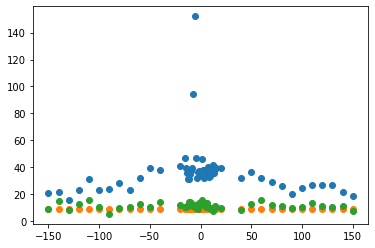

In [10]:
plt.scatter(plot_dist, np.exp(plot_vals)-np.mean(control[1]))
#plt.axhline(y = np.mean(control[1]), color = 'r', linestyle = 'dashed')    
plt.scatter(plot_dist, np.exp(m1_vals)-np.mean(control[1]))
plt.scatter(, np.exp(m2_vals)-np.mean(control[1]))


In [14]:
np.argmax(np.exp(plot_vals)-np.mean(control[1]))

33

In [17]:
plot_dist[33]

-6

In [18]:
control[1].shape

(100, 1)

In [19]:
controlm = np.mean(control[1])

# y =  alpha * m1 + beta* m2 + gamme*(a*b)+yeta*d  (y,m1,m2 are average response)

In [20]:
Y = plot_vals
d = plot_dist
X = np.array([m1_vals-np.log(controlm), m2_vals-np.log(controlm), (m1_vals-np.log(controlm))*(m2_vals-np.log(controlm)), d]).transpose()
print(X.shape)

(56, 4)


In [21]:
model = OLS(Y,X)

In [22]:
results = model.fit()

In [23]:
print(results.t_test([1, 0, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            21.5761      0.749     28.797      0.000      20.073      23.080


In [24]:
print(results.t_test([0, 1, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          8.705e+05   4.36e+06      0.200      0.843   -7.88e+06    9.63e+06


In [25]:
print(results.t_test([0, 0, 1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -4.478e+06   2.24e+07     -0.200      0.843   -4.95e+07    4.06e+07


In [26]:
print(results.t_test([0, 0, 0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0          2.637e-05      0.000      0.071      0.944      -0.001       0.001


In [27]:
model

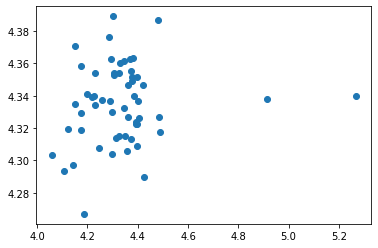

In [28]:
plt.scatter(Y,results.predict())

# # y =  alpha * m1 + beta* m2 + gamme*(a*b)+yeta*d  (y,m1,m2 are not average response)


In [29]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals = []
m1_vals = []
m2_vals = []
control1 = []
for idx in range(len(distance)):
    plot_vals.append(np.log(np.squeeze(all_data[idx][1])))
    m1_vals.append(np.log(np.squeeze(all_data_m1[idx][1])))
    m2_vals.append(np.log(np.squeeze(all_data_m2[idx][1])))
    plot_dist.append([distance[idx]]*all_data[idx][1].shape[0])
    control1.append(np.log(np.squeeze(control[1])))
    

In [30]:
Y = np.array(plot_vals).flatten()
d = np.array(plot_dist).flatten()
m1 = np.array(m1_vals).flatten()
m2 = np.array(m2_vals).flatten()
controls = np.array(control1).flatten()
X = np.array([m1-controls, m2-controls, (m1-controls)*(m2-controls), d]).transpose()
print(X.shape)

(5600, 4)


In [31]:
model = OLS(Y,X)

In [32]:
results = model.fit()

In [33]:
print(results.t_test([1, 0, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             8.7777      0.151     58.215      0.000       8.482       9.073


In [34]:
print(results.t_test([0, 1, 0, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             6.1635      0.163     37.707      0.000       5.843       6.484


In [35]:
print(results.t_test([0, 0, 1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0           -11.8346      0.517    -22.879      0.000     -12.849     -10.821


In [36]:
print(results.t_test([0, 0, 0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0005      0.001     -0.917      0.359      -0.002       0.001


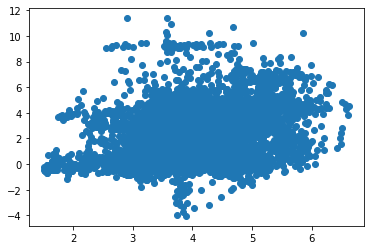

In [37]:
plt.scatter(Y,results.predict())

In [38]:
from scipy.stats import pearsonr

In [39]:
pearsonr(Y,results.predict())

(0.3416244493742371, 4.3723006848814736e-153)

# y =  alpha * m1 + beta* m2 + gamme*(a*b)  (for max distance)


In [40]:
all_data = data_in_spacings+data_in_spacings_rev
all_data_m1 = motif1_only + motif1_only_rev
all_data_m2 = motif2_only + motif2_only_rev

plot_dist= []
plot_vals_mean = []
m1_vals = []
m2_vals = []
control1 = []
for idx in range(len(distance)):
    plot_vals_mean.append(np.log(np.mean(np.squeeze(all_data[idx][1]), axis=-1)))
    plot_vals.append(np.log(np.squeeze(all_data[idx][1])))
    m1_vals.append(np.log(np.squeeze(all_data_m1[idx][1])))
    m2_vals.append(np.log(np.squeeze(all_data_m2[idx][1])))
    plot_dist.append([distance[idx]]*all_data[idx][1].shape[0])
    control1.append(np.log(np.squeeze(control[1])))
    

In [41]:
np.argmax(plot_vals_mean)

33

In [42]:
np.mean(np.exp(plot_vals_mean[33])-np.exp(control1[33]))

152.1156

In [43]:
#plot_dist[33]

In [44]:
# m1 = np.exp(np.array(m1_vals[33]).flatten())
# m2 =  np.exp(np.array(m2_vals[33]).flatten())
# controls =  np.exp(np.array(control1[33]).flatten())
# Y =  np.exp(np.array(plot_vals[33]).flatten()) - controls
# X = np.array([m1-controls, m2-controls, (m1-controls)*(m2-controls)]).transpose()
# #X = np.array([(m1-controls)*(m2-controls)]).transpose()
# import statsmodels.api as sm
# X = sm.add_constant(X)
# print(X.shape)

m1 = np.array(m1_vals[33]).flatten()
m2 = np.array(m2_vals[33]).flatten()
controls = np.array(control1[33]).flatten()
Y = np.array(plot_vals[33]).flatten() - controls - (m1-controls) - (m2-controls)
X = np.array([(m1-controls)*(m2-controls)]).transpose()
#X = np.array([(m1-controls)*(m2-controls)]).transpose()
import statsmodels.api as sm
#X = sm.add_constant(X)
print(X.shape)

(100, 1)


In [45]:
model = OLS(Y,X)

In [46]:
results = model.fit()

In [47]:
print(results.params)

[3.552647]


In [48]:
print(results.t_test([1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.5526      0.996      3.567      0.001       1.577       5.529


In [49]:
#print(results.t_test([0, 1, 0, 0]))

In [50]:
#print(results.t_test([0, 0, 1, 0]))

In [51]:
#print(results.t_test([0, 0, 0, 1]))

Text(0, 0.5, 'Predicted')

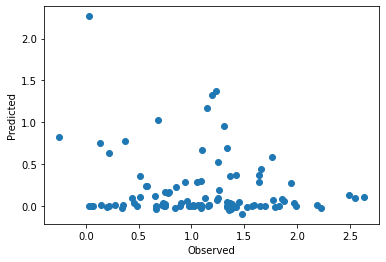

In [53]:
plt.scatter(Y,results.predict())
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [78]:
#from scipy.spatial import distance

In [79]:
pearsonr(Y,results.predict())

(0.5734681994001165, 4.4865324176201594e-10)

In [80]:
pearsonr(Y,m1)

(-0.04172942029546904, 0.6801727401589416)

In [61]:
pearsonr(Y,m2)

(-0.051046836175067556, 0.6139946923444743)

In [62]:
from scipy.stats import wilcoxon



In [63]:
wilcoxon(m1-2*controls+m2-Y)

WilcoxonResult(statistic=11.0, pvalue=5.430296382634715e-18)

In [64]:
wilcoxon(m1-2*controls+m2-Y,alternative='less')

WilcoxonResult(statistic=11.0, pvalue=2.7151481913173574e-18)